In [1]:
### 资金流入流出挑战赛

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


### 读取数据

In [6]:
data = pd.read_csv('D:/DataSet/Purchase_Redemption_Data/user_balance_table.csv')

In [7]:
data.shape

(2840421, 18)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2840421 entries, 0 to 2840420
Data columns (total 18 columns):
 #   Column               Dtype  
---  ------               -----  
 0   user_id              int64  
 1   report_date          int64  
 2   tBalance             int64  
 3   yBalance             int64  
 4   total_purchase_amt   int64  
 5   direct_purchase_amt  int64  
 6   purchase_bal_amt     int64  
 7   purchase_bank_amt    int64  
 8   total_redeem_amt     int64  
 9   consume_amt          int64  
 10  transfer_amt         int64  
 11  tftobal_amt          int64  
 12  tftocard_amt         int64  
 13  share_amt            int64  
 14  category1            float64
 15  category2            float64
 16  category3            float64
 17  category4            float64
dtypes: float64(4), int64(14)
memory usage: 390.1 MB


In [10]:
data.head()

,user_id,report_date,tBalance,yBalance,total_purchase_amt,direct_purchase_amt,purchase_bal_amt,purchase_bank_amt,total_redeem_amt,consume_amt,transfer_amt,tftobal_amt,tftocard_amt,share_amt,category1,category2,category3,category4
0,1,20140805,20385,20383,2,0,0,0,0,0,0,0,0,2,NaN,NaN,NaN,NaN
1,1,20140808,20391,20389,2,0,0,0,0,0,0,0,0,2,NaN,NaN,NaN,NaN
2,1,20140811,20397,20395,2,0,0,0,0,0,0,0,0,2,NaN,NaN,NaN,NaN
3,1,20140814,20403,20401,2,0,0,0,0,0,0,0,0,2,NaN,NaN,NaN,NaN
4,1,20140817,20409,20407,2,0,0,0,0,0,0,0,0,2,NaN,NaN,NaN,NaN


In [12]:
#将report_date转化为日期形式
data['report_date'] = pd.to_datetime(data['report_date'],format='%Y%m%d')

In [13]:
data.head()

,user_id,report_date,tBalance,yBalance,total_purchase_amt,direct_purchase_amt,purchase_bal_amt,purchase_bank_amt,total_redeem_amt,consume_amt,transfer_amt,tftobal_amt,tftocard_amt,share_amt,category1,category2,category3,category4
0,1,2014-08-05,20385,20383,2,0,0,0,0,0,0,0,0,2,NaN,NaN,NaN,NaN
1,1,2014-08-08,20391,20389,2,0,0,0,0,0,0,0,0,2,NaN,NaN,NaN,NaN
2,1,2014-08-11,20397,20395,2,0,0,0,0,0,0,0,0,2,NaN,NaN,NaN,NaN
3,1,2014-08-14,20403,20401,2,0,0,0,0,0,0,0,0,2,NaN,NaN,NaN,NaN
4,1,2014-08-17,20409,20407,2,0,0,0,0,0,0,0,0,2,NaN,NaN,NaN,NaN


我们的目标是：  
   1 预测后30天的申购总额       
   2 预测后30天的赎回总额   
   即预测total_purchase_amt,total_redeem_amt这两个字段后30天的值

In [14]:
data_byday = data.groupby(['report_date'])['total_purchase_amt','total_redeem_amt'].sum()
data_byday = data_byday.sort_values('report_date')

D:\conda\envs\py36\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [32]:
data_byday.shape

(427, 2)

In [16]:
data_byday.head()

,total_purchase_amt,total_redeem_amt
report_date,,
2013-07-01,32488348,5525022
2013-07-02,29037390,2554548
2013-07-03,27270770,5953867
2013-07-04,18321185,6410729
2013-07-05,11648749,2763587


In [17]:
data_byday.tail()

,total_purchase_amt,total_redeem_amt
report_date,,
2014-08-27,302194801,468164147
2014-08-28,245082751,297893861
2014-08-29,267554713,273756380
2014-08-30,199708772,196374134
2014-08-31,275090213,292943033


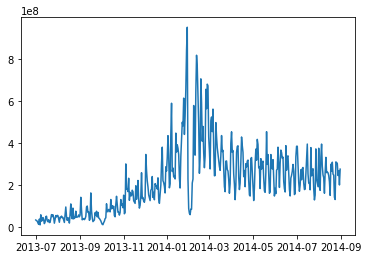

In [18]:
plt.plot(data_byday['total_purchase_amt'])
plt.show()

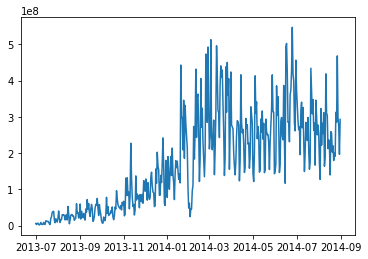

In [19]:
plt.plot(data_byday['total_redeem_amt'])
plt.show()

### 建立ARMA模型

In [20]:
from statsmodels.tsa.arima_model import ARMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#### 模型定阶

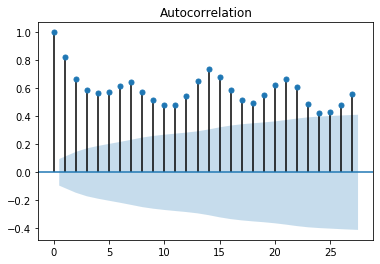

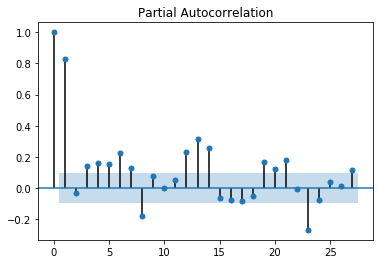

In [26]:
plot_acf(data_byday['total_purchase_amt'])
plot_pacf(data_byday['total_purchase_amt'])
plt.show()

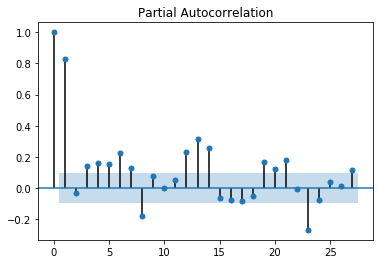

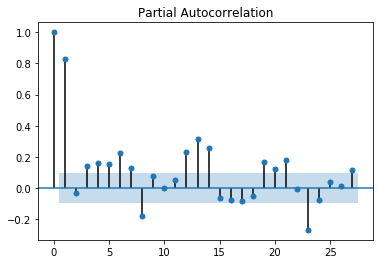

In [22]:
plot_acf(data_byday['total_redeem_amt'])
plot_pacf(data_byday['total_redeem_amt'])
plt.show()

In [27]:
model = ARMA(data_byday['total_purchase_amt'],(5,5)).fit()

D:\conda\envs\py36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [28]:
#绘制白噪声序列
resid = model.resid

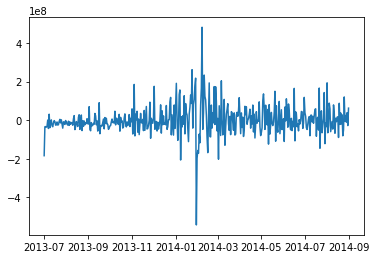

In [31]:
plt.plot(resid)
plt.show()

In [33]:
pre = model.predict(start=0,end=457)

In [34]:
pre.shape

(458,)

In [36]:
pre.tail()

2014-09-27    1.974415e+08
2014-09-28    2.080876e+08
2014-09-29    2.398292e+08
2014-09-30    2.658118e+08
2014-10-01    2.628680e+08
Freq: D, dtype: float64

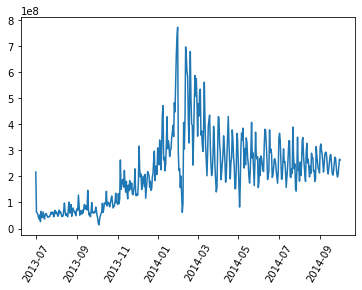

In [39]:
plt.plot(pre)
plt.xticks(rotation=60)
plt.show()